In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
%matplotlib inline

def moving_average(a, n=3) :
    weights = np.repeat(1.0, n)/n
    sma = np.convolve(a, weights, 'full')
    return sma[:-(n-1)]

Error std: 58.261828


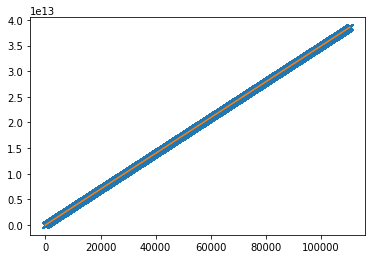

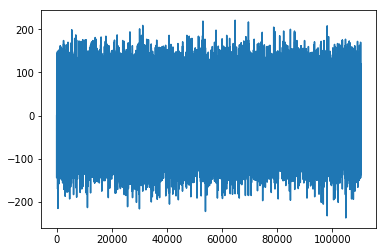

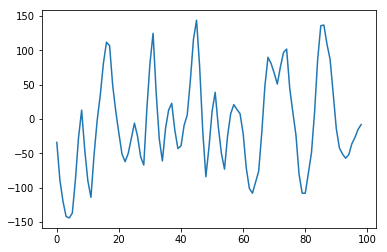

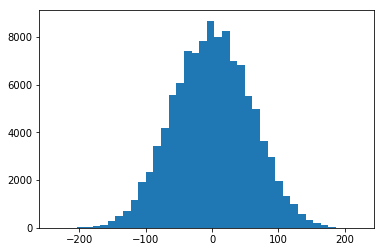

In [2]:
fname = 'servo_delayed_0ns.txt'

T = np.genfromtxt(fname, delimiter=',',dtype='float128')
ptp = T[2:,0];
hw = T[2:,1];
est = T[2:,2];

# subtract first value to be able to use 32 bit float
t = ptp[0];
ptp = np.array(ptp - t,dtype='float');
hw = np.array(hw,dtype='float');
est = np.array(est - t,dtype='float');

deviation_0 = est-ptp;
print "Error std: %f" % np.std(deviation_0)

# first timestamp is the reference
plot(ptp,'x')
plot(est)
show();

# plot timestamp difference
plt.plot(deviation_0);
show();
plot(deviation_0[1:100]);
show();
hist(deviation_0,bins=40);
show();



In [3]:
fname = 'tk_log_100ms.txt'

T = np.genfromtxt(fname, delimiter=',',dtype='uint64')
tk_ptp = T[2:,0];
tk_hw = T[2:,1];
tk_est = T[2:,2];

# subtract first value to be able to use 32 bit float float
t = tk_ptp[0];
tk_ptp = np.array(tk_ptp - t,dtype='float');
tk_hw = np.array(tk_hw,dtype='float');
tk_est = np.array(tk_est - t,dtype='float');


Error std: 58.325627


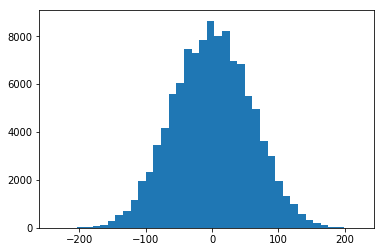

In [4]:
fname = 'servo_delayed_1ms.txt'
T = np.genfromtxt(fname, delimiter=',',dtype='float128')
ptp = T[2:,0];
hw = T[2:,1];
est = T[2:,2];

# subtract first value to be able to use 32 bit float
t = ptp[0];
ptp = np.array(ptp - t,dtype='float');
hw = np.array(hw,dtype='float');
est = np.array(est - t,dtype='float');

deviation_1 = est-ptp;
print "Error std: %f" % np.std(deviation_1)

# plot timestamp difference
hist(deviation_1,bins=40);
show();


Error std: 58.874072


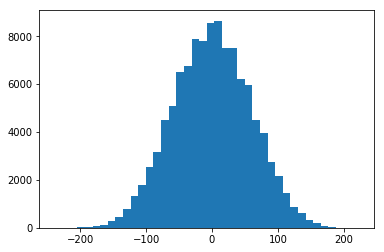

In [5]:
fname = 'servo_delayed_10ms.txt'
T = np.genfromtxt(fname, delimiter=',',dtype='float128')
ptp = T[2:,0];
hw = T[2:,1];
est = T[2:,2];

# subtract first value to be able to use 32 bit float
t = ptp[0];
ptp = np.array(ptp - t,dtype='float');
hw = np.array(hw,dtype='float');
est = np.array(est - t,dtype='float');

deviation_10 = est-ptp;
print "Error std: %f" % np.std(deviation_10)

hist(deviation_10,bins=40);
show();


Error std: 65.087170


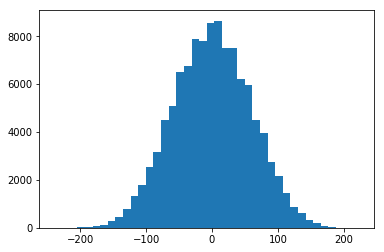

In [6]:
fname = 'servo_delayed_100ms.txt'
T = np.genfromtxt(fname, delimiter=',',dtype='float128')
ptp = T[2:,0];
hw = T[2:,1];
est = T[2:,2];

# subtract first value to be able to use 32 bit float
t = ptp[0];
ptp = np.array(ptp - t,dtype='float');
hw = np.array(hw,dtype='float');
est = np.array(est - t,dtype='float');

deviation_100 = est-ptp;
print "Error std: %f" % np.std(deviation_100)

hist(deviation_10,bins=40);
show();


Error std: 73.778788


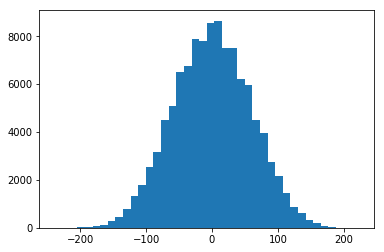

In [7]:
fname = 'servo_delayed_200ms.txt'
T = np.genfromtxt(fname, delimiter=',',dtype='float128')
ptp = T[2:,0];
hw = T[2:,1];
est = T[2:,2];

# subtract first value to be able to use 32 bit float
t = ptp[0];
ptp = np.array(ptp - t,dtype='float');
hw = np.array(hw,dtype='float');
est = np.array(est - t,dtype='float');

deviation_200 = est-ptp;
print "Error std: %f" % np.std(deviation_200)

hist(deviation_10,bins=40);
show();


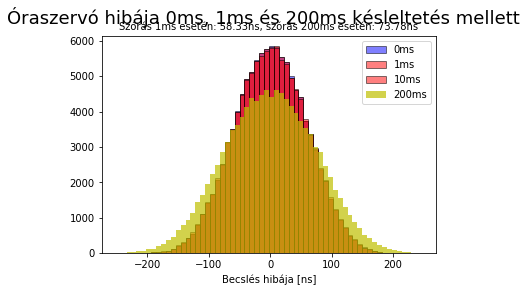

In [8]:
std_200 = np.std(deviation_200)
std_10 = nnp.p.std()
std_1 = np.std(deviation_1)

suptitle(u"Óraszervó hibája 0ms, 1ms és 200ms késleltetés mellett",fontsize=18)
title(u"Szórás 1ms esetén: %.2fns, szórás 200ms esetén: %.2fns" % (std_1,std_200),fontsize=10)
hist(deviation_0,bins=np.arange(-250,250,8),alpha=0.5,color='b',edgecolor='k',label=u'0ms');
hist(deviation_1,bins=np.arange(-250,250,8),alpha=0.5,color='r',edgecolor='k',label='1ms');
hist(deviation_10,bins=np.arange(-250,250,8),alpha=0.5,color='r',edgecolor='k',label='10ms');
hist(deviation_200,bins=np.arange(-250,250,8),alpha=0.7,color='y',label=u'200ms');

legend()
xlabel(u"Becslés hibája [ns]")
show();


In [9]:
print len(deviation_200)
print len(deviation_100)
print len(deviation_10)
print len(deviation_1)

110419
110419
110419
110419


Error std: 58.325627


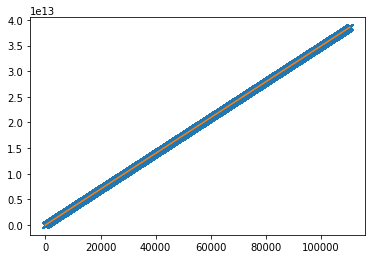

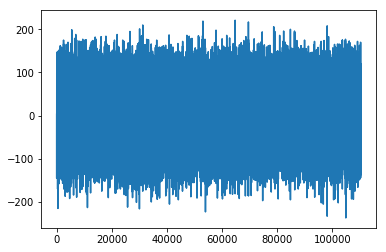

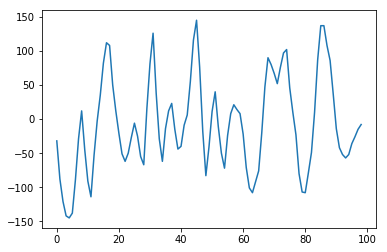

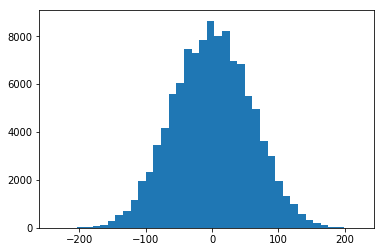

In [10]:
## real servo result (timekeeper)
fname = './PPS_log/timekeeper_20.log'

T = np.genfromtxt(fname, delimiter=',',dtype='float128')
ptp = T[2:,0];
hw = T[2:,1];
est = T[2:,2];

# subtract first value to be able to use 32 bit float
t = ptp[0];
ptp = np.array(ptp - t,dtype='float');
hw = np.array(hw,dtype='float');
est = np.array(est - t,dtype='float');

deviation = est-ptp;
print "Error std: %f" % np.std(deviation)

# first timestamp is the reference
plot(ptp,'x')
plot(est)
show();

# plot timestamp difference
plt.plot(deviation);
show();
plot(deviation[1:100]);
show();
hist(deviation,bins=40);
show();


<IPython.core.display.Javascript object>


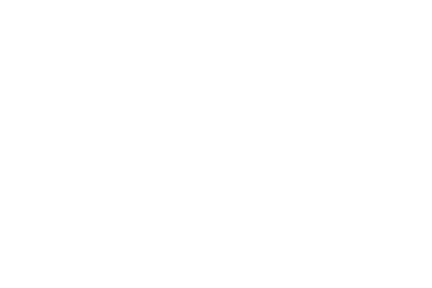

<IPython.core.display.Javascript object>


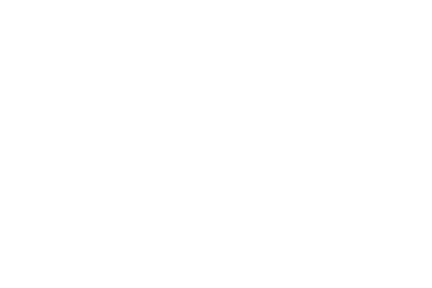

In [11]:
# make the devations from the linear regression more visible
%matplotlib notebook

h = hw[30:130]/1e9;
e = est[30:130];
p = ptp[30:130];

# cal linear regression
m,b = np.polyfit(h,p,1);
linreg = m*h+b;

de = e - linreg;
dp = p - linreg;

e2 = de;
p2 =  dp;

plot(h,p2,'x-',label = u"CPTS időbélyeg");
plot(h,e2,'x-', label=u"Szervó becslése");
suptitle(u"Idők eltérése a regressziós egyenestől",fontsize=16)
legend();